Pyber Findings: 

- As population density increases there are more drivers and rides being delivered but the average fare tends to decrease.
- The data suggests that Urban Pyber drivers are in a high ride volume-low fare environment whereas Rural drivers are in a low ride volume-higher fare environment with Suburban drivers in between those two groups.
- 80% of Pyber drivers drive in Urban areas but account for just 62% of Pyber fares.
- 16% of Pyber drivers drive in Suburban areas but account nearly twice (31%) their proportion of fares.
- Just 3% of Pyber drivers operate in Rural areas and these drivers account for 7% of Pyber's total fares.


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
#city_and_ride_data = pd.merge(city_data, ride_data,)
combined_city_ride_df = pd.merge(ride_data, city_data, on="city")
combined_city_ride_df.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [66]:
# 1 Obtain the x and y coordinates for each of the three city types

# 2 Build the scatter plots for each city types

# 3 Incorporate the other graph properties

# 4 Create a legend

# 5 Incorporate a text label regarding circle size

# 6 Save Figure


In [2]:
# 1a get x and y coordinates for each city type
# here are the number of rides per city
rides_per_city = combined_city_ride_df.groupby('city').count()[['ride_id']]
rides_per_city.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [3]:
# 1 get x and y coordinates for each city type
# here is the average fare
average_fare = combined_city_ride_df.groupby('city').mean()[['fare']]
average_fare.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [4]:
# 1 get x and y coordinates for each city type
# we also need to bring in a count of drivers per city
driver_count = combined_city_ride_df.groupby('city').mean()[['driver_count']]
driver_count.head()

,driver_count
city,
Amandaburgh,12.0
Barajasview,26.0
Barronchester,11.0
Bethanyland,22.0
Bradshawfurt,7.0


In [5]:
# 1 get x and y coordinates for each city type
# we also need to bring in city type and merge it into the rides_x_avgfare dataframe
get_city_data = city_data[["city","type"]]
get_city_data.head()

,city,type
0,Richardfort,Urban
1,Williamsstad,Urban
2,Port Angela,Urban
3,Rodneyfort,Urban
4,West Robert,Urban


In [6]:
# 1 get x and y coordinates for each city type
# 1st merge of the two dataframes
rides_x_avgfare = pd.merge(rides_per_city, average_fare, on="city")
rides_x_avgfare.head()

,ride_id,fare
city,,
Amandaburgh,18,24.641667
Barajasview,22,25.332273
Barronchester,16,36.422500
Bethanyland,18,32.956111
Bradshawfurt,10,40.064000


In [7]:
# 1 get x and y coordinates for each city type
# 1st merge of the two dataframes, add city type
rides_x_avgfare = pd.merge(rides_x_avgfare, get_city_data, on="city")
rides_x_avgfare.head()

,city,ride_id,fare,type
0,Amandaburgh,18,24.641667,Urban
1,Barajasview,22,25.332273,Urban
2,Barronchester,16,36.422500,Suburban
3,Bethanyland,18,32.956111,Suburban
4,Bradshawfurt,10,40.064000,Rural


In [8]:
# 1 get x and y coordinates for each city type
# 2nd merge of the two dataframes, add driver count
rides_x_avgfare = pd.merge(rides_x_avgfare, driver_count, on="city")
rides_x_avgfare.head()

,city,ride_id,fare,type,driver_count
0,Amandaburgh,18,24.641667,Urban,12.0
1,Barajasview,22,25.332273,Urban,26.0
2,Barronchester,16,36.422500,Suburban,11.0
3,Bethanyland,18,32.956111,Suburban,22.0
4,Bradshawfurt,10,40.064000,Rural,7.0


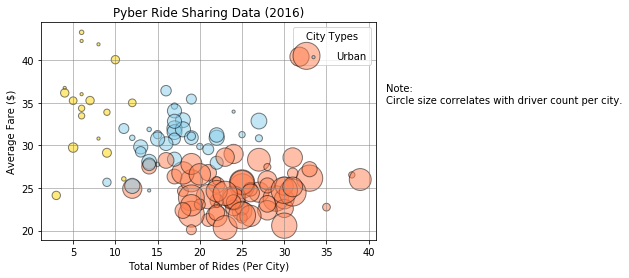

In [72]:
# use a function to assign colors to each row based on city type
def citytype_color (row):
    if row['type'] == 'Urban' :
        return 'coral'
    if row['type'] == 'Suburban' :
        return 'skyblue'
    return 'gold'

# use the apply function to apply the function, note axis=1 says 'row level'
rides_x_avgfare.apply(lambda row: citytype_color(row), axis=1)

# save the results into a new column
rides_x_avgfare['color_label'] = rides_x_avgfare.apply (lambda row: citytype_color(row), axis=1)

# create scatter variables
x_axis = rides_x_avgfare['ride_id']
y_axis = rides_x_avgfare['fare']
area = rides_x_avgfare['driver_count']*10
color = rides_x_avgfare['color_label']

# plot the scatter
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.scatter(x_axis, y_axis, s=area, marker="o", color=color, alpha=.5, edgecolors="black")
plt.text(42,35,"Note:\nCircle size correlates with driver count per city.")
plt.grid(linestyle='-', linewidth='0.5', color='grey')
     
c_types = ["Urban", "Suburban", "Rural"]
c_type_colors = ["coral", "skyblue","gold"]
plt.legend(c_types, scatterpoints=3, loc="upper right", handletextpad=2, columnspacing=200, markerfirst=True, labelspacing=1, frameon=True, ncol=1, title="City Types")
plt.show()

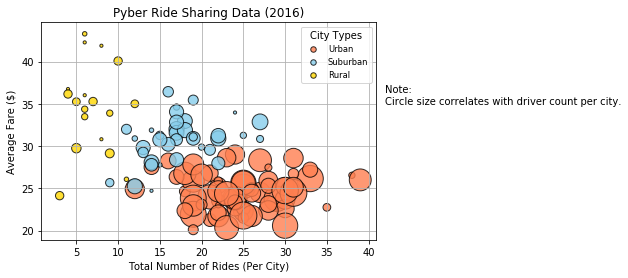

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [51]:
# group fares by city type
grp_fares_by_ctype = pd.DataFrame(combined_city_ride_df, columns=["type","fare"])
grp_fares_by_ctype.groupby(["type"]).groups.keys()
# get city type fares
fares_by_ctype = grp_fares_by_ctype.groupby("type")["fare"].sum()
# convert to frame
fares_by_ctype = fares_by_ctype.to_frame()
fares_by_ctype

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


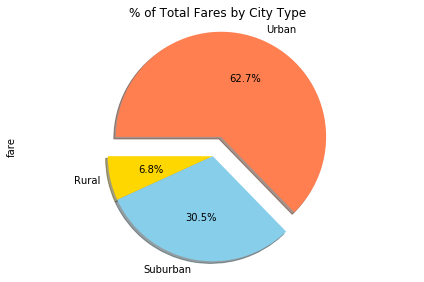

In [117]:
# Build Pie Chart

explode = (0,0,.2)
colors = ('gold', 'skyblue', 'coral')

fares_by_ctype.plot.pie(y="fare", explode=explode, autopct="%1.1f%%", shadow=True, colors=colors, startangle=180)

# draw it as a circle
plt.axis('equal')
# add title
plt.title("% of Total Fares by City Type")
# remove legend
plt.legend().set_visible(False)

# Save Figure
plt.tight_layout()
plt.savefig("js_total_fares_by_ctype.jpg")
plt.show()

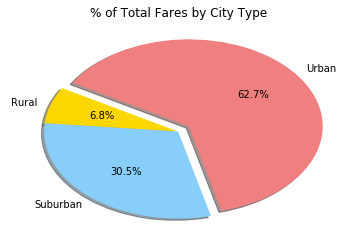

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [101]:
# group rides by city type
grp_rides_by_ctype = pd.DataFrame(combined_city_ride_df, columns=["type","ride_id"])
grp_rides_by_ctype.groupby(["type"]).groups.keys()
# get city type rides as % of total rides
rides_by_ctype = grp_rides_by_ctype.groupby("type")["ride_id"].count()
# convert to frame
rides_by_ctype = rides_by_ctype.to_frame()
rides_by_ctype

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


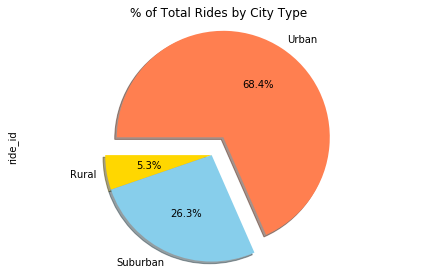

In [116]:
explode = (0,0,.2)
colors = ('gold', 'skyblue', 'coral')

rides_by_ctype.plot.pie(y="ride_id", explode=explode, autopct="%1.1f%%", shadow=True, colors=colors, startangle=180)

# draw it as a circle
plt.axis('equal')
# add title
plt.title("% of Total Rides by City Type")
# remove legend
plt.legend().set_visible(False)

# Save Figure
plt.tight_layout()
plt.savefig("js_total_rides_by_ctype.jpg")
plt.show()

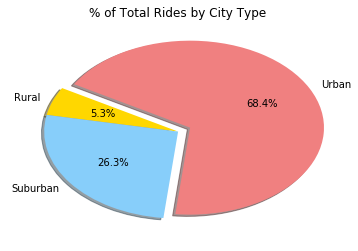

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [111]:
# group rides by city type
grp_drivers_by_ctype = pd.DataFrame(rides_x_avgfare, columns=["type","driver_count"])
grp_drivers_by_ctype.groupby(["type"]).groups.keys()
# get total drivers by city type as % of total drivers
drivers_by_ctype = grp_drivers_by_ctype.groupby("type")["driver_count"].sum()
# convert to frame
drivers_by_ctype = drivers_by_ctype.to_frame()
drivers_by_ctype

,driver_count
type,
Rural,78.0
Suburban,490.0
Urban,2405.0


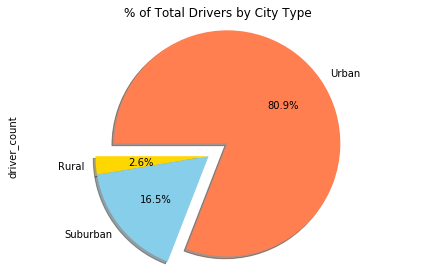

In [115]:
explode = (0,0,.2)
colors = ('gold', 'skyblue', 'coral')

drivers_by_ctype.plot.pie(y="driver_count", explode=explode, autopct="%1.1f%%", shadow=True, colors=colors, startangle=180)

# draw it as a circle
plt.axis('equal')
# add title
plt.title("% of Total Drivers by City Type")
# remove legend
plt.legend().set_visible(False)

# Save Figure
plt.tight_layout()
plt.savefig("js_total_drivers_by_ctype.jpg")
plt.show()

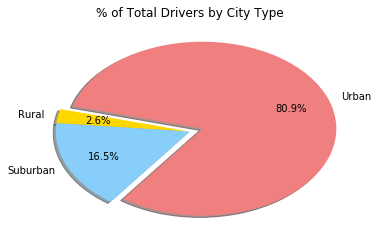

In [6]:
# Show Figure
plt.show()